Back to the [README](./README.md)

Back to the [fitting notebook](./05-fitting-df_low.ipynb)

Back to the [previous notebook](./06-linear-regression-using-scikit-learn.ipynb)

--------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from setup import df_low, Col

--------------------

# Linear Regression Using Statmodels.API

In [2]:
# Set up the data
x = df_low[Col.age2].copy()    # age**2
y = df_low[Col.charges].copy() # charges

x_ = sm.add_constant(x)

# Create a model with the data
model = sm.OLS(y, x_).fit()

# Quickly check the result
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 2.205e+04
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        13:46:05   Log-Likelihood:                -7809.5
No. Observations:                 965   AIC:                         1.562e+04
Df Residuals:                     963   BIC:                         1.563e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1160.1072     47.143     24.608      0.0

In [3]:
print(f'R^2:\t\t{model.rsquared}')
print(f'R^2 adj.:\t{model.rsquared_adj}')
print(f'Coefficients:\n{model.params}')

R^2:		0.9581524960085102
R^2 adj.:	0.958109040656494
Coefficients:
const      1160.107216
$age^2$       3.363981
dtype: float64


Those values match the ones we got from from the `sklearn` package.
A plus, however, is that we can extract statistical data--our confidence range
in particular--directly from our model!

In [4]:
model.conf_int()

,0,1
const,1067.592089,1252.622342
$age^2$,3.319523,3.408440


Well, in fact, we get much, much more than that... But that goes beyond the purpose of this exercise.

For now, let's take note that we arrive at the fit
$$c_{1, r}(a) =  (3.363981 \pm 0.043412) \cdot a^2 + \underbrace{1160.107216 \pm 90.810665}_{n_{1, r}}$$

This statements holds for a $95%$ certainty level; this is the default for `.conf_int()` and can be
set using the parameter `sig` (for 'significance').

Also note that the randomness that we denoted with $r$ is entirely covered by those confidence levels,
so we could simplify our notation by dropping $r$ entirely at this point.

Let's plot the result:

In [5]:
ci = np.array(model.conf_int())
df_low[Col.line]  = model.predict(x_)
df_low['lower'] = df_low.age.map(lambda age: ci[0, 0] + ci[1, 0] * age**2)
df_low['upper'] = df_low.age.map(lambda age: ci[0, 1] + ci[1, 1] * age**2)
fill = df_low[[Col.age, 'lower', 'upper']].sort_values(Col.age).drop_duplicates()

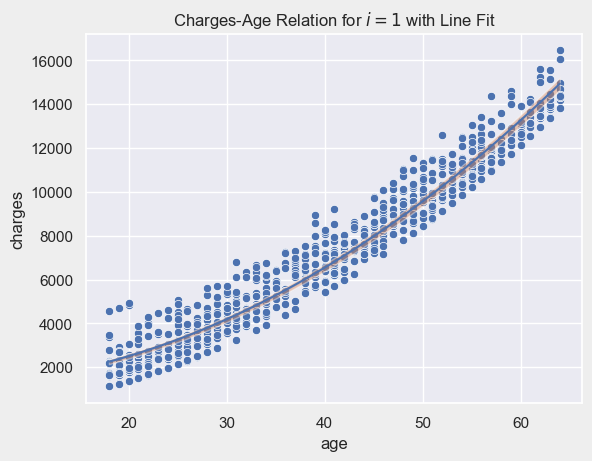

In [6]:
sns.scatterplot(data=df_low, x=Col.age, y=Col.charges)
sns.lineplot(data=df_low, x=Col.age, y=Col.line)
plt.fill_between(fill.age, fill.lower, fill.upper, alpha=.4)
plt.title('Charges-Age Relation for $i=1$ with Line Fit')
plt.show()

Finally, we have one more [package](./08-linear-regression-using-scipy-stats.ipynb) to look into.

--------------------

Back to the [README](./README.md)

Back to the [fitting notebook](./05-fitting-df_low.ipynb)

To the [next notebook](./08-linear-regression-using-scipy-stats.ipynb)